In [175]:
import glob
from skimage.transform import resize
from skimage import feature
import cv2
import pandas as pd
import json
import base64
from os import listdir
from PIL import Image as PImage
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn import metrics

In [176]:
def read_path_file(path,files_list):
    for files in glob.glob(path):
        files_list.append(files)       

In [177]:
paths = ['5 Classes flower dataset\Daffodil\*' , '5 Classes flower dataset\Daisy\*', '5 Classes flower dataset\Iris\*', '5 Classes flower dataset\Sunflower\*', '5 Classes flower dataset\Windflower\*']

In [178]:
Daffodil = []
Daisy = []
Iris = []
Sunflower = []
Windflower = []

In [179]:
Lists_list = [Daffodil, Daisy, Iris, Sunflower, Windflower]

In [180]:
for i in range(5):
    for files in glob.glob(paths[i]):
        Lists_list[i].append(files)

In [181]:
Daffodil

['5 Classes flower dataset\\Daffodil\\image_0001.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0002.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0003.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0004.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0005.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0006.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0007.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0008.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0009.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0010.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0011.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0012.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0013.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0014.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0015.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0016.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0017.jpg',
 '5 Classes flower dataset\\Daffodil\\image_0018.jpg',
 '5 Classe

In [182]:
# crate new dataframe

Daffodil_dataframe = pd.DataFrame(Daffodil, columns = ['files'])
Daisy_dataframe = pd.DataFrame(Daisy,columns = ['files'])
Iris_dataframe = pd.DataFrame(Iris,columns = ['files'])
Sunflower_dataframe = pd.DataFrame(Sunflower,columns = ['files'])
Windflower_dataframe = pd.DataFrame(Windflower,columns = ['files'])

Daffodil_dataframe['Class'] = 'Daffodil'
Daisy_dataframe['Class'] = 'Daisy'
Iris_dataframe['Class'] = 'Iris'
Sunflower_dataframe['Class'] = 'Sunflower'
Windflower_dataframe['Class'] = 'Windflower'

DataFrame_Lists = [Daffodil_dataframe,Daisy_dataframe,Iris_dataframe,Sunflower_dataframe,Windflower_dataframe]

DataFrame_Lists

[                                               files     Class
 0   5 Classes flower dataset\Daffodil\image_0001.jpg  Daffodil
 1   5 Classes flower dataset\Daffodil\image_0002.jpg  Daffodil
 2   5 Classes flower dataset\Daffodil\image_0003.jpg  Daffodil
 3   5 Classes flower dataset\Daffodil\image_0004.jpg  Daffodil
 4   5 Classes flower dataset\Daffodil\image_0005.jpg  Daffodil
 ..                                               ...       ...
 75  5 Classes flower dataset\Daffodil\image_0076.jpg  Daffodil
 76  5 Classes flower dataset\Daffodil\image_0077.jpg  Daffodil
 77  5 Classes flower dataset\Daffodil\image_0078.jpg  Daffodil
 78  5 Classes flower dataset\Daffodil\image_0079.jpg  Daffodil
 79  5 Classes flower dataset\Daffodil\image_0080.jpg  Daffodil
 
 [80 rows x 2 columns],
                                             files  Class
 0   5 Classes flower dataset\Daisy\image_0801.jpg  Daisy
 1   5 Classes flower dataset\Daisy\image_0802.jpg  Daisy
 2   5 Classes flower dataset\Da

In [183]:
Conc_data = pd.concat(DataFrame_Lists,ignore_index=True)
Conc_data

,files,Class
0,5 Classes flower dataset\Daffodil\image_0001.jpg,Daffodil
1,5 Classes flower dataset\Daffodil\image_0002.jpg,Daffodil
2,5 Classes flower dataset\Daffodil\image_0003.jpg,Daffodil
3,5 Classes flower dataset\Daffodil\image_0004.jpg,Daffodil
4,5 Classes flower dataset\Daffodil\image_0005.jpg,Daffodil
...,...,...
395,5 Classes flower dataset\Windflower\image_1276...,Windflower
396,5 Classes flower dataset\Windflower\image_1277...,Windflower
397,5 Classes flower dataset\Windflower\image_1278...,Windflower
398,5 Classes flower dataset\Windflower\image_1279...,Windflower


In [184]:
# stratify to take the same percent from each class

X = Conc_data['files']
y = Conc_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)



In [195]:
extract_List = []
for img in X_train:
     #  read the image
    image = cv2.imread(img)
    #  convert image to RGP color
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #  resize the image to be (90* 90) RGP
    image = resize(image, (64, 64))
    # extract image features using hog
    (hog, hog_image) = feature.hog(image, orientations=9,
                pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                visualize=True)
    extract_List.append(hog)


5 Classes flower dataset\Daffodil\image_0014.jpg


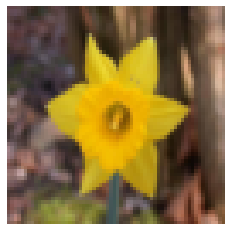

In [193]:
image = cv2.imread(X_train.iloc[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = resize(image, (64, 64))

plt.axis("off")
plt.imshow(image)
print(X_train.iloc[0])

5 Classes flower dataset\Daffodil\image_0014.jpg


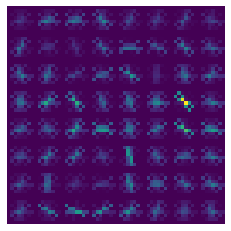

In [187]:
        
(hog, hog_image) = feature.hog(image, orientations=9,
                pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                visualize=True)

plt.axis("off")
plt.imshow(hog_image)
print(X_train.iloc[0])

In [188]:
hog.shape

(1764,)

In [189]:
final_data = pd.DataFrame(extract_List)
final_data

,0,1,2,3,4,5,6,7,8,9,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763
0,0.230009,0.064353,0.179234,0.230009,0.230009,0.094797,0.081739,0.087182,0.141303,0.230009,...,0.295271,0.295271,0.109913,0.188178,0.162749,0.172343,0.118001,0.139003,0.178458,0.295271
1,0.161305,0.116347,0.157760,0.135089,0.191540,0.054456,0.060464,0.112342,0.130824,0.193642,...,0.224980,0.225751,0.109010,0.016062,0.035746,0.225751,0.090597,0.225751,0.225751,0.225751
2,0.203821,0.112490,0.023114,0.182767,0.154308,0.062897,0.209476,0.202236,0.230842,0.140517,...,0.020834,0.348901,0.012603,0.201021,0.039544,0.006948,0.000000,0.000000,0.082427,0.348901
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062333,...,0.206055,0.167794,0.131101,0.076682,0.087906,0.073936,0.043601,0.031042,0.009084,0.081595
4,0.246281,0.226967,0.174927,0.130144,0.187243,0.044038,0.026753,0.159215,0.055580,0.246281,...,0.252763,0.116504,0.152454,0.070943,0.059432,0.068500,0.064521,0.024365,0.008908,0.034579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.126464,0.059204,0.014269,0.055047,0.084767,0.006255,0.108812,0.167161,0.089202,0.047796,...,0.020339,0.044830,0.000000,0.000000,0.003348,0.265752,0.069174,0.341263,0.319494,0.009152
296,0.125041,0.009670,0.012529,0.036327,0.088490,0.006755,0.017916,0.014719,0.073390,0.248793,...,0.310547,0.310547,0.144505,0.073815,0.046908,0.121753,0.060595,0.069393,0.045350,0.147978
297,0.159821,0.212215,0.135732,0.233660,0.203836,0.076986,0.016700,0.000000,0.195887,0.245393,...,0.043605,0.077369,0.016054,0.174948,0.214122,0.259860,0.052923,0.110139,0.050708,0.011453
298,0.258498,0.215630,0.096111,0.080300,0.119813,0.052502,0.100696,0.258498,0.258498,0.258498,...,0.224047,0.156119,0.097914,0.202808,0.183855,0.226135,0.011853,0.147547,0.216624,0.060718


In [190]:
#fit_model
gnb_model = gnb()
gnb_model.fit(final_data, y_train)


GaussianNB()

In [194]:
#open pickle_file , weite , dump upload to file
nvPickle = open('gnbPickle_file', 'wb')
pickle.dump(gnb_model, nvPickle)

In [199]:
import os
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename
import json


In [201]:
UPLOAD_FOLDER = './static/uploads'
ALLOWED_EXTENSIONS = {'jpg'}

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS


@app.route('/', methods=['GET'])
def home():
    return render_template('upload.html')

@app.route('/predictions', methods=['POST'])
def upload():
    
    if 'file' not in request.files:
        response = app.response_class(
            response=json.dumps({'message': 'No file part'}),
            status=422,
            mimetype='application/json'
        )
        return response
    file = request.files['file']
    selected_model = request.form.get('model')
    
    
    if file.filename == '':
        response = app.response_class(
            response=json.dumps({'message': 'No selected file'}),
            status=422,
            mimetype='application/json'
        )
        
        return response
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))

        image_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        features = get_hog_features(image_path)

        result = ''
        if selected_model == 'nb':

            loaded_model = pickle.load(open('models/gnbPickle_file', 'rb'))
            result = loaded_model.predict(features.flatten().reshape(1, -1))

        response = app.response_class(
            response=json.dumps({
                'message': 'This is endpoint',
                'model': selected_model,
                'result': label_decode(result[0])
            }),
            status=200,
            mimetype='application/json'
        )
        return response


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1